In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
(training_data, training_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = training_data.mean(axis = 0)
training_data -= mean
std = training_data.std(axis = 0)
training_data /= std

test_data -= mean
test_data/= std

In [4]:
from keras import models
from keras import layers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation = "relu", input_shape = (training_data.shape[1], )))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mean_absolute_error"])
              
    return model

In [5]:
import numpy as np

k = 4
num_samples = len(training_data)//4
num_epochs = 100
all_scores = []

In [6]:
for i in range(k):
    
    print("processing fold", i)
    
    val_data = training_data[i*num_samples : (i+1)*num_samples]
    val_targets = training_targets[i*num_samples : (i+1)*num_samples]
    
    trn_data = np.concatenate([training_data[:i*num_samples], training_data[(i+1)*num_samples:]], axis=0)
    trn_targets = np.concatenate([training_targets[:i*num_samples], training_targets[(i+1)*num_samples:]], axis=0)
    
    model = build_model()
    model.fit(trn_data, trn_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold 0

processing fold 1
processing fold 2
processing fold 3


In [7]:
print(all_scores)
print(np.mean(all_scores))

[2.189377546310425, 2.5072364807128906, 2.503275156021118, 2.542922019958496]
2.4357028007507324


In [8]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    
    print("processing fold", i)
    
    val_data = training_data[i*num_samples : (i+1)*num_samples]
    val_targets = training_targets[i*num_samples : (i+1)*num_samples]
    
    trn_data = np.concatenate([training_data[:i*num_samples], training_data[(i+1)*num_samples:]], axis=0)
    trn_targets = np.concatenate([training_targets[:i*num_samples], training_targets[(i+1)*num_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(trn_data, trn_targets, epochs = num_epochs, validation_data=(val_data, val_targets), batch_size = 1, verbose = 0)
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


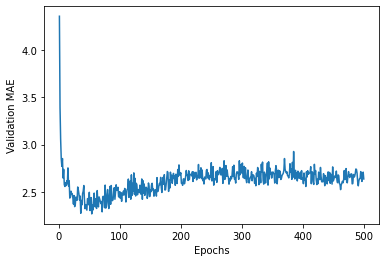

In [9]:
import matplotlib.pyplot as plt

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

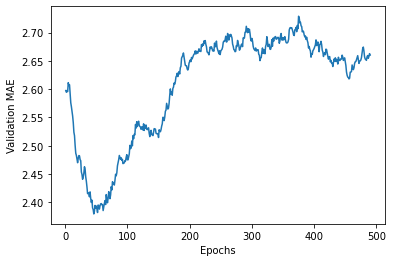

In [11]:
def smooth_curve(points, factor = 0.9):
    
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
model = build_model()
model.fit(training_data, training_targets, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 584us/step
2.5180726051330566


In [39]:
predictions = model.predict(test_data)

print("%8s %6s %8s %8s" %("index", "try", "actual", "error"))
for x, i in enumerate(predictions):
    for j in i:
        print("%8d %6.2f %6.1f %6.1f" %(x, j, test_targets[x], j - test_targets[x]))

   index    try   actual    error
       0   7.15    7.2   -0.0
       1  19.24   18.8    0.4
       2  21.60   19.0    2.6
       3  30.88   27.0    3.9
       4  25.61   22.2    3.4
       5  20.86   24.5   -3.6
       6  28.39   31.2   -2.8
       7  22.67   22.9   -0.2
       8  19.01   20.5   -1.5
       9  21.75   23.2   -1.5
      10  17.21   18.6   -1.4
      11  17.31   14.5    2.8
      12  15.65   17.8   -2.1
      13  43.88   50.0   -6.1
      14  20.31   20.8   -0.5
      15  20.96   24.3   -3.3
      16  27.58   24.2    3.4
      17  19.84   19.8    0.0
      18  18.33   19.1   -0.8
      19  27.67   22.7    5.0
      20  10.35   12.0   -1.7
      21  12.92   10.2    2.7
      22  21.51   20.0    1.5
      23  15.83   18.5   -2.7
      24  21.09   20.9    0.2
      25  25.85   23.0    2.9
      26  29.57   27.5    2.1
      27  31.40   30.1    1.3
      28  10.70    9.5    1.2
      29  21.81   22.0   -0.2
      30  19.99   21.2   -1.2
      31  14.52   14.1    0.4
      